<a href="https://colab.research.google.com/github/MientusJJ/Python-Exercises/blob/main/Kopia_notatnika_Z06_B_underfitting_vs_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Underfitting vs. Overfitting

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import  metrics

Rozważmy następujący zbiór punktów:

In [ ]:
np.random.seed(0)
n_samples = 30
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

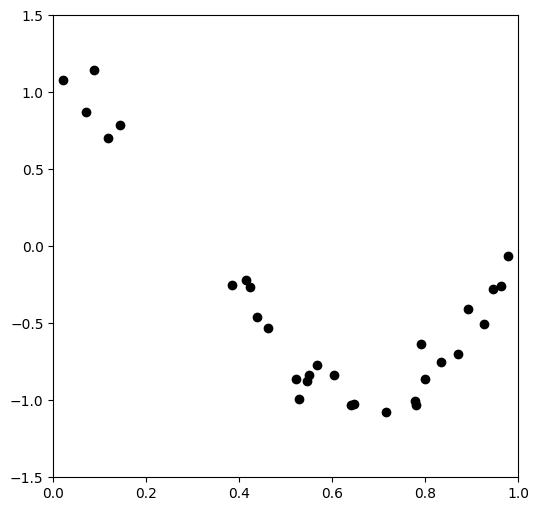

In [ ]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X, y,  color='black')
x_tr = np.linspace(0, 1, 200)
plt.show()

Podziel dane na dwie grupy.

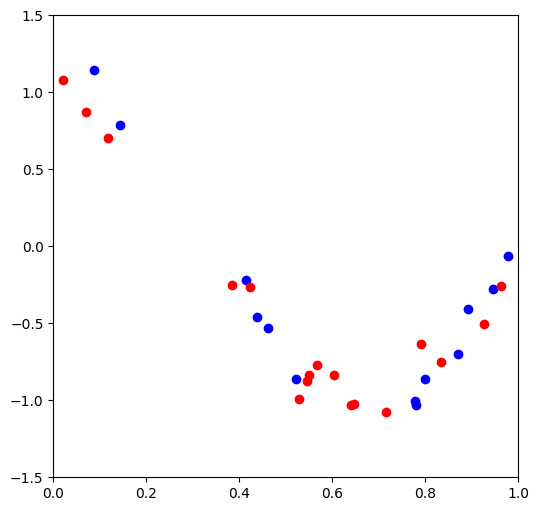

In [ ]:
s=np.random.random_sample(n_samples)
s[s>0.5]=1
s[s<=0.5]=0
s
X1=X[s==1]
y1=y[s==1]
X2=X[s==0]
y2=y[s==0]

# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
x_tr = np.linspace(0, 1, 200)
plt.show()

# Zadanie
Wykonaj regresję:

* liniową
* wielomianową stopnia 20

w każdej z grup.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import datasets, linear_model
from sklearn import  metrics

[-1.4406353]
0.5529192153964099
0.42750035355499727
[-1.85153276]
0.5766640092685786
0.5591028685078241


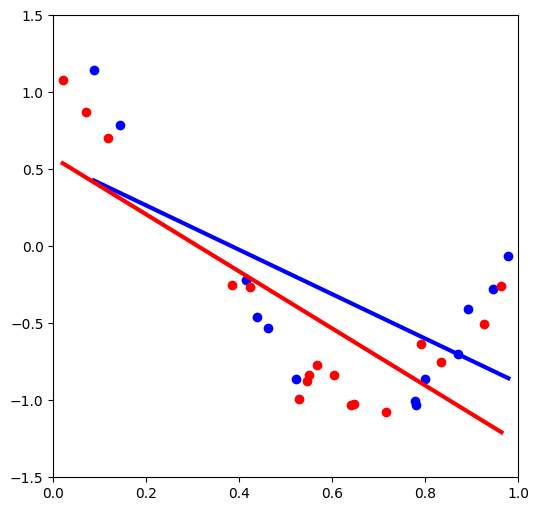

In [ ]:
x1=np.vstack(X1)
model1 = linear_model.LinearRegression()
model1.fit(x1, y1)
print(model1.coef_)
print(model1.intercept_)
print(model1.score(x1,y1))
x2=np.vstack(X2)

model2 = linear_model.LinearRegression()
model2.fit(x2, y2)
print(model2.coef_)
print(model2.intercept_)
print(model2.score(x2,y2))

plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
plt.plot(x1, model1.predict(x1), color='blue',linewidth=3)
plt.plot(x2, model2.predict(x2), color='red',linewidth=3)
x_tr = np.linspace(0, 1, 200)
plt.show()

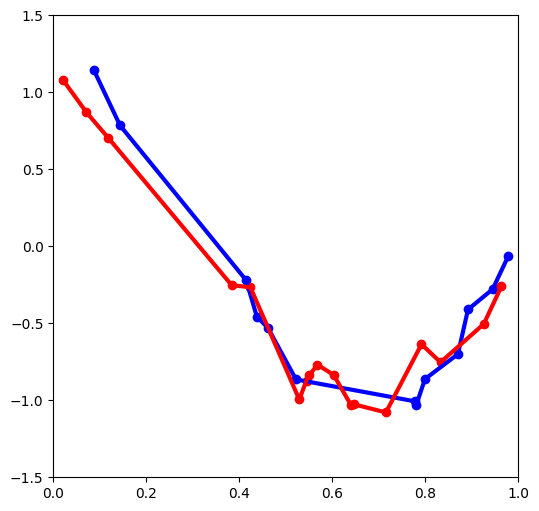

In [ ]:
x1=np.vstack(X1)
model1 = make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression())
model1.fit(x1, y1)
x2=np.vstack(X2)

model2 = make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression())
model2.fit(x2, y2)

plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
plt.plot(x1, model1.predict(x1), color='blue',linewidth=3)
plt.plot(x2, model2.predict(x2), color='red',linewidth=3)
x_tr = np.linspace(0, 1, 200)
plt.show()

# Zadanie
Wykonaj 100 podziałów na dwie równe części. Za każdym razem naucz regresję:

* liniową
* wielomianową stopnia 1, 2, 3, 4, 5, 6

na jednym fragmęcie i policz R_square na drugim.
Zwizualizuj wynik.


ValueError: ignored

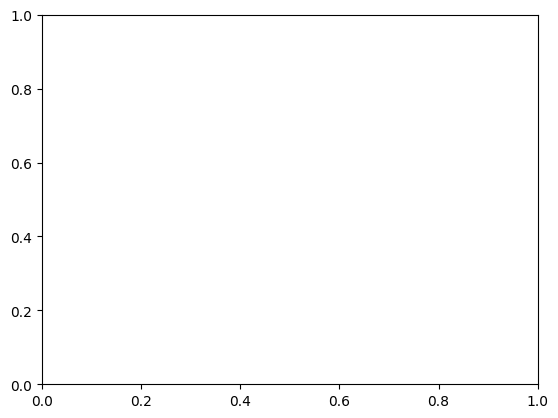

In [ ]:
from sklearn.metrics import r2_score
def split_data(data):
    n = len(data)
    split_point = n // 2
    return data[:split_point], data[split_point:]

def train_and_score_model(data, degree):
    x_train = data[0][0]
    y_train = data[0][1]
    x_test = data[1][0]
    y_test = data[1][1]
    polynomial_features = PolynomialFeatures(degree=degree)
    x_train_poly = polynomial_features.fit_transform(x_train.reshape(-1, 1))
    x_test_poly = polynomial_features.transform(x_test.reshape(-1, 1))
    model = LinearRegression()
    model.fit(x_train_poly, y_train)
    y_pred = model.predict(x_test_poly)
    r2 = r2_score(y_test, y_pred)
    return r2



np.random.seed(0)
n_samples = 300
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1
num_splits = 100
data = np.column_stack((X, y))
degrees = [1, 2, 3, 4, 5, 6]

results = [[] for _ in degrees]

for _ in range(num_splits):
    data1, data2 = split_data(data)
    for i, degree in enumerate(degrees):
        r2 = train_and_score_model((data1, data2), degree)
        results[i].append(r2)

mean_results = [np.mean(x) for x in results]
plt.plot(degrees, mean_results)
plt.title(' R_square')
plt.xlabel('degree')
plt.ylabel('R_square')
plt.show()